IMPORTING LIBRARIES

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

LOAD THE DATASET

In [2]:
df = pd.read_csv('DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


DATA CLEANING

In [3]:
np.sum(df.isna())

C:\Users\ASUS\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


In [4]:
# Replace missing values in 'Customer Zipcode' and 'Order Zipcode' with 0
df['Customer Zipcode'] = df['Customer Zipcode'].fillna(0)
df['Order Zipcode'] = df['Order Zipcode'].fillna(0)

# Replace missing values in 'Customer Fname' with "NotDetermined"
df['Customer Fname'] = df['Customer Fname'].fillna("NotDetermined")

# Create 'Customer Full Name' by combining 'Customer Fname' and 'Customer Lname'
df['Customer Full Name'] = df['Customer Fname'].astype(str) + df['Customer Lname'].astype(str)

In [5]:
dfData=df.drop(['Customer Email','Product Status','Customer Password','Customer Street','Customer Fname','Customer Lname',
           'Product Description','Product Image','Order Zipcode','Customer Zipcode'],axis=1)
dfData.shape

(180519, 44)

In [6]:
dfData.columns = [col.lower().replace(' ', '_') for col in dfData.columns]
dfData.rename(columns=lambda x: x.replace("(", "").replace(")", ""), inplace=True)
dfData.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'delivery_status',
       'late_delivery_risk', 'category_id', 'category_name', 'customer_city',
       'customer_country', 'customer_id', 'customer_segment', 'customer_state',
       'department_id', 'department_name', 'latitude', 'longitude', 'market',
       'order_city', 'order_country', 'order_customer_id',
       'order_date_dateorders', 'order_id', 'order_item_cardprod_id',
       'order_item_discount', 'order_item_discount_rate', 'order_item_id',
       'order_item_product_price', 'order_item_profit_ratio',
       'order_item_quantity', 'sales', 'order_item_total',
       'order_profit_per_order', 'order_region', 'order_state', 'order_status',
       'product_card_id', 'product_category_id', 'product_name',
       'product_price', 'shipping_date_dateorders', 'shipping_mode',
       'customer_full_name'],
      dtype='object')

In [7]:
Delivery=dfData.groupby('delivery_status')
Market = dfData.groupby('market') 
Region = dfData.groupby('order_region')
Customer=dfData.groupby('customer_segment')
Category=dfData.groupby('category_name')
Shipping=dfData.groupby('shipping_mode')
Region=dfData.groupby('order_region')

CUSTOMER SEGMENT ANALYSIS

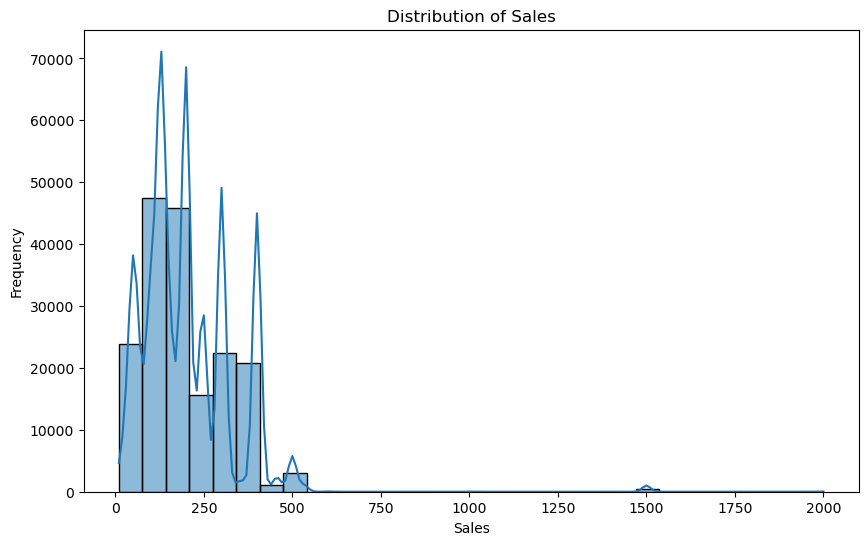

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=dfData, x='sales', bins=30, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

In [9]:
customer_segment_counts = dfData['customer_segment'].value_counts()

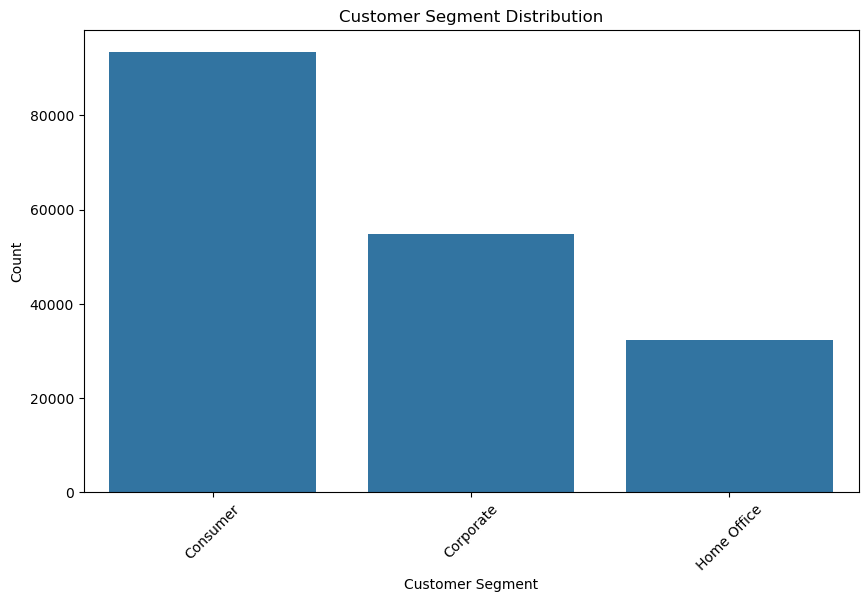

In [10]:
# Plotting Customer Segment Counts
plt.figure(figsize=(10, 6))
sns.barplot(x=customer_segment_counts.index, y=customer_segment_counts.values)
plt.title('Customer Segment Distribution')
plt.xlabel('Customer Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

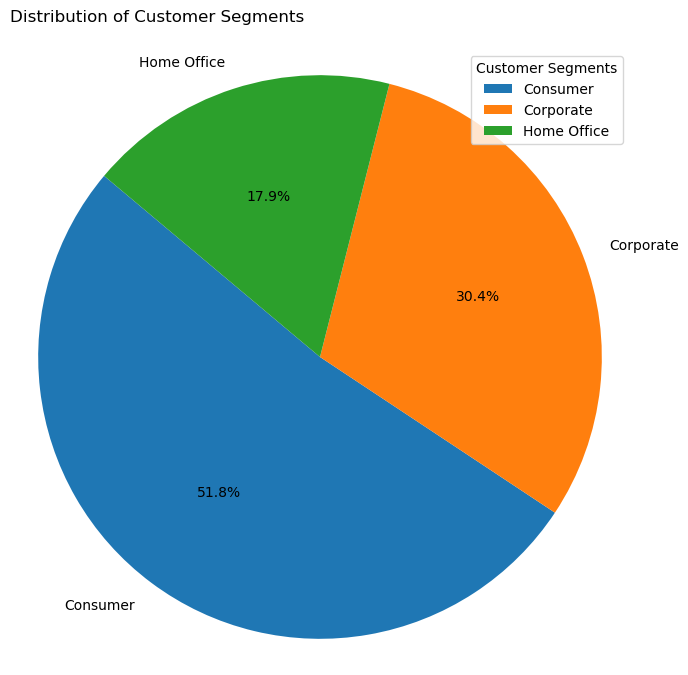

In [11]:
plt.figure(figsize=(8, 8))
plt.pie(customer_segment_counts, labels=customer_segment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Customer Segments',loc='left', pad=20)
plt.axis('equal')
plt.legend(customer_segment_counts.index, title='Customer Segments', loc='best')
plt.show()

MARKET ANALYSIS

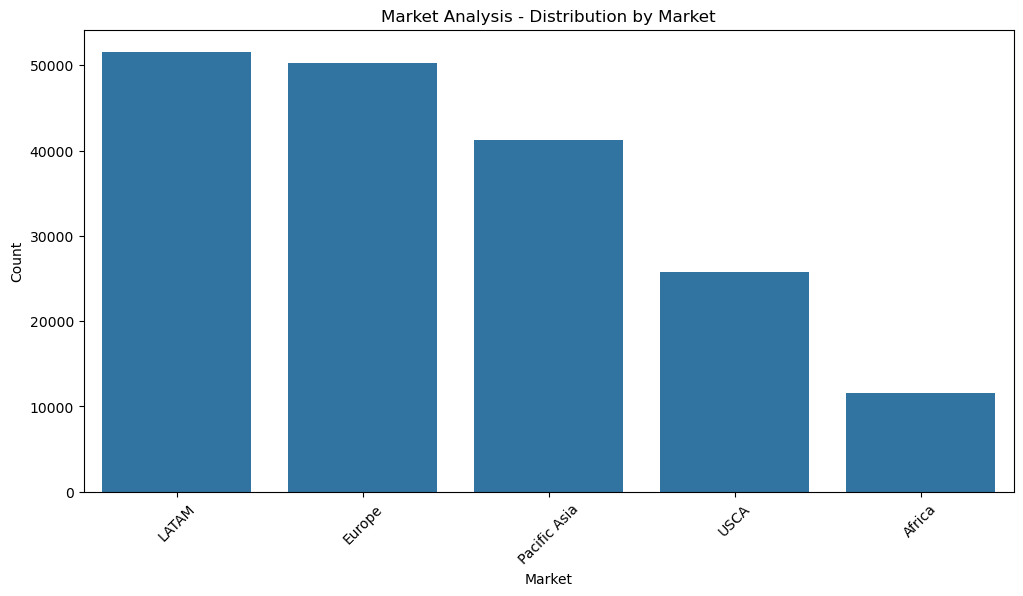

In [12]:
market_counts = dfData['market'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=market_counts.index, y=market_counts.values)
plt.title('Market Analysis - Distribution by Market')
plt.xlabel('Market')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

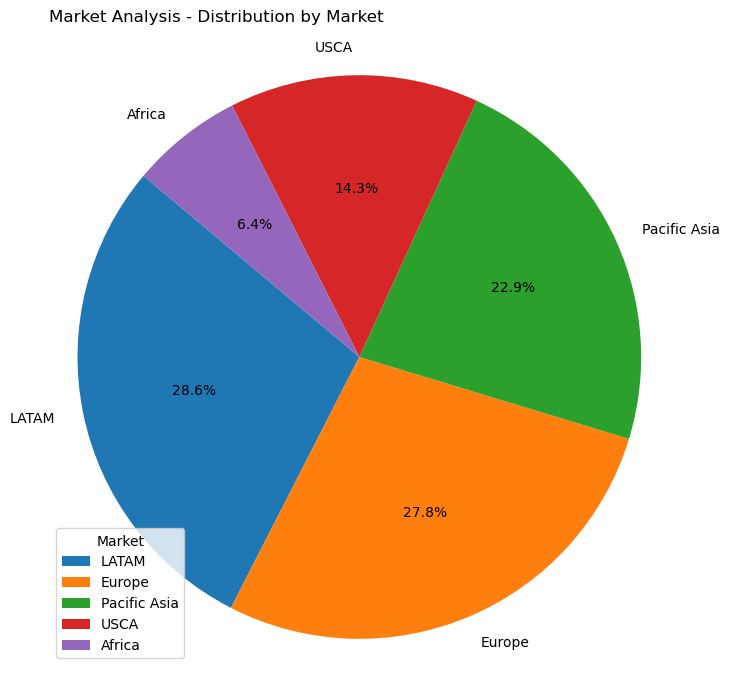

In [13]:
plt.figure(figsize=(8, 8))
plt.pie(market_counts, labels=market_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Market Analysis - Distribution by Market', loc='left', pad=20)
plt.axis('equal') 
plt.legend(market_counts.index, title='Market', loc='best')
plt.show()

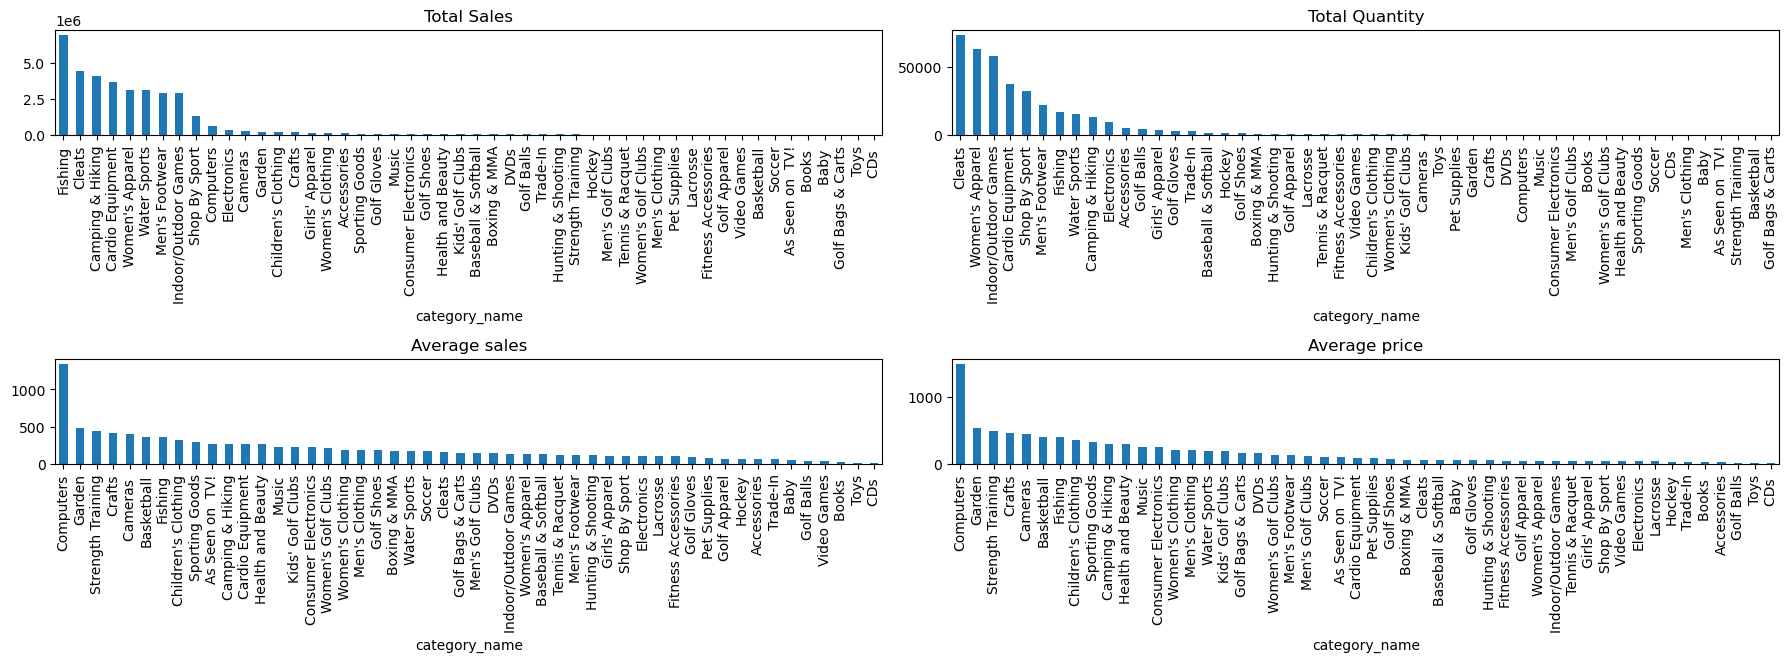

In [14]:
plt.figure(figsize=(10,12))
plt.subplot(6, 2, 1)
Category['sales'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Sales")

plt.subplot(6, 2, 2)
Category['order_item_quantity'].sum().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Total Quantity")

plt.subplot(6, 2, 3)
Category['sales_per_customer'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average sales")

plt.subplot(6, 2, 4)
Category['product_price'].mean().sort_values(ascending=False).plot.bar(figsize=(18,18), title="Average price")


plt.tight_layout()
plt.show()

RISK MANAGEMENT -DELIVERY

C:\Users\ASUS\AppData\Local\Temp\ipykernel_25116\3278726722.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=dfData, x='delivery_status', order=delivery_status_summary.index, palette='Set2')


Delivery Status Summary:
delivery_status
Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: count, dtype: int64


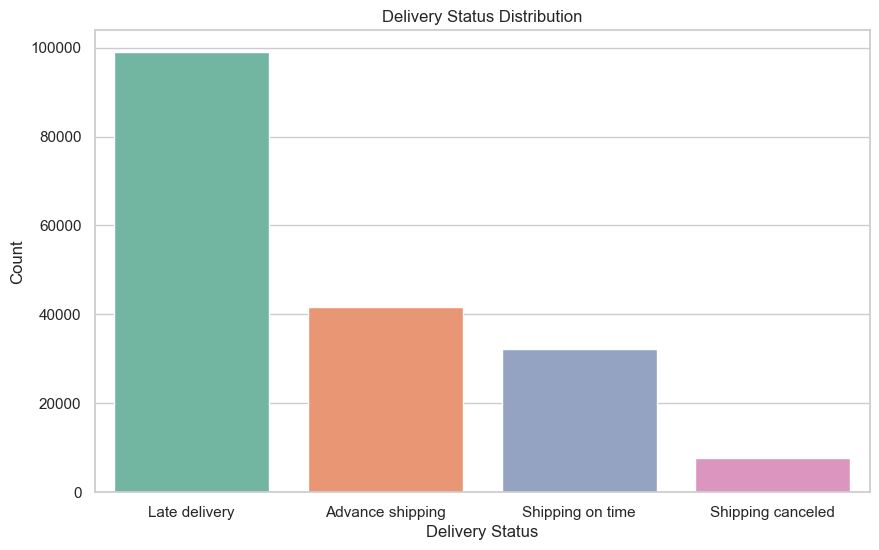

In [15]:
delivery_status_data = dfData['delivery_status']

# Summary Statistics
delivery_status_summary = delivery_status_data.value_counts()

# Visualization
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(data=dfData, x='delivery_status', order=delivery_status_summary.index, palette='Set2')
plt.title('Delivery Status Distribution')
plt.xlabel('Delivery Status')
plt.ylabel('Count')

# Display summary statistics
print("Delivery Status Summary:")
print(delivery_status_summary)

In [16]:
late_deliveries = dfData[dfData['delivery_status'] == 'Late delivery']

Cross-Tabulation (Contingency Table) with Percentages:
delivery_status  Advance shipping  Late delivery  Shipping canceled  \
shipping_mode                                                         
First Class              0.000000      95.322499           4.677501   
Same Day                 0.000000      45.743042           4.559926   
Second Class             0.000000      76.632781           4.003862   
Standard Class          38.599748      38.071683           4.268134   

delivery_status  Shipping on time  
shipping_mode                      
First Class              0.000000  
Same Day                49.697032  
Second Class            19.363358  
Standard Class          19.060435  


<Figure size 1200x800 with 0 Axes>

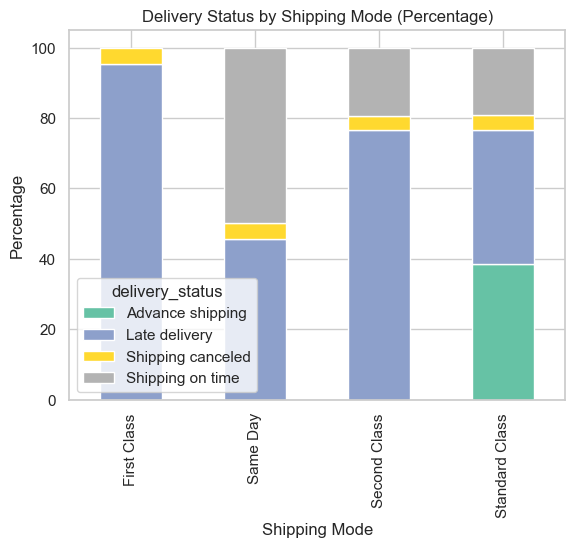

In [17]:
delivery_status_data = dfData['delivery_status']
shipping_mode_data = dfData['shipping_mode']

# Create a cross-tabulation (contingency table) to analyze the relationship
cross_tab = pd.crosstab(shipping_mode_data, delivery_status_data)

# Calculate row percentages
cross_tab_percent = cross_tab.div(cross_tab.sum(1), axis=0) * 100

# Visualize the cross-tabulation as a stacked bar chart with percentages
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
cross_tab_percent.plot(kind="bar", stacked=True, colormap='Set2')
plt.title('Delivery Status by Shipping Mode (Percentage)')
plt.xlabel('Shipping Mode')
plt.ylabel('Percentage')

# Display the cross-tabulation with percentages
print("Cross-Tabulation (Contingency Table) with Percentages:")
print(cross_tab_percent)

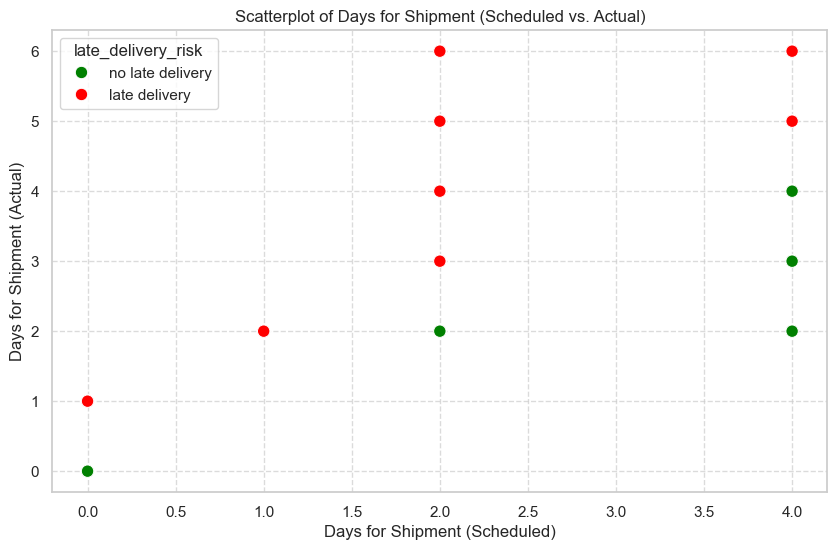

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
dfData['late_delivery_risk'] = dfData['late_delivery_risk'].map({0: 'no late delivery', 1: 'late delivery'})

palette = {'no late delivery': 'green', 'late delivery': 'red'}

scatter = sns.scatterplot(x="days_for_shipment_scheduled", y="days_for_shipping_real", hue="late_delivery_risk", data=dfData, palette=palette, s=80)
plt.title('Scatterplot of Days for Shipment (Scheduled vs. Actual)')
plt.xlabel('Days for Shipment (Scheduled)')
plt.ylabel('Days for Shipment (Actual)')

plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

CLASSIFICATION MODELS FOR LATE DELIVERY


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [21]:
train_Data = dfData.copy()

In [22]:
train_Data['late_delivery']=np.where(train_Data['delivery_status'] == 'Late delivery', 1, 0) 

In [23]:
train_Data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,delivery_status,late_delivery_risk,category_id,category_name,customer_city,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,late_delivery
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,no late delivery,73,Sporting Goods,Caguas,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,late delivery,73,Sporting Goods,Caguas,...,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,309.720001,Shipping on time,no late delivery,73,Sporting Goods,San Jose,...,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,no late delivery,73,Sporting Goods,Los Angeles,...,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,no late delivery,73,Sporting Goods,Caguas,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,0


In [24]:
train_data=train_Data.drop(['delivery_status','late_delivery_risk'], axis=1) #Dropping columns with repeated values

In [25]:
train_data.head()

,type,days_for_shipping_real,days_for_shipment_scheduled,benefit_per_order,sales_per_customer,category_id,category_name,customer_city,customer_country,customer_id,...,order_state,order_status,product_card_id,product_category_id,product_name,product_price,shipping_date_dateorders,shipping_mode,customer_full_name,late_delivery
0,DEBIT,3,4,91.250000,314.640015,73,Sporting Goods,Caguas,Puerto Rico,20755,...,Java Occidental,COMPLETE,1360,73,Smart watch,327.75,2/3/2018 22:56,Standard Class,CallyHolloway,0
1,TRANSFER,5,4,-249.089996,311.359985,73,Sporting Goods,Caguas,Puerto Rico,19492,...,Rajastán,PENDING,1360,73,Smart watch,327.75,1/18/2018 12:27,Standard Class,IreneLuna,1
2,CASH,4,4,-247.779999,309.720001,73,Sporting Goods,San Jose,EE. UU.,19491,...,Rajastán,CLOSED,1360,73,Smart watch,327.75,1/17/2018 12:06,Standard Class,GillianMaldonado,0
3,DEBIT,3,4,22.860001,304.809998,73,Sporting Goods,Los Angeles,EE. UU.,19490,...,Queensland,COMPLETE,1360,73,Smart watch,327.75,1/16/2018 11:45,Standard Class,TanaTate,0
4,PAYMENT,2,4,134.210007,298.250000,73,Sporting Goods,Caguas,Puerto Rico,19489,...,Queensland,PENDING_PAYMENT,1360,73,Smart watch,327.75,1/15/2018 11:24,Standard Class,OrliHendricks,0


In [26]:
train_data.columns

Index(['type', 'days_for_shipping_real', 'days_for_shipment_scheduled',
       'benefit_per_order', 'sales_per_customer', 'category_id',
       'category_name', 'customer_city', 'customer_country', 'customer_id',
       'customer_segment', 'customer_state', 'department_id',
       'department_name', 'latitude', 'longitude', 'market', 'order_city',
       'order_country', 'order_customer_id', 'order_date_dateorders',
       'order_id', 'order_item_cardprod_id', 'order_item_discount',
       'order_item_discount_rate', 'order_item_id', 'order_item_product_price',
       'order_item_profit_ratio', 'order_item_quantity', 'sales',
       'order_item_total', 'order_profit_per_order', 'order_region',
       'order_state', 'order_status', 'product_card_id', 'product_category_id',
       'product_name', 'product_price', 'shipping_date_dateorders',
       'shipping_mode', 'customer_full_name', 'late_delivery'],
      dtype='object')

In [27]:
# List of columns to encode
columns_to_encode = [
    'customer_country', 'market', 'type', 'product_name', 'customer_segment',
    'customer_state', 'order_region', 'order_city', 'category_name',
    'customer_city', 'department_name', 'order_state', 'order_status',
    'shipping_mode', 'order_country', 'customer_full_name'
]

# Initialize the LabelEncoder
le = LabelEncoder()

# Encode categorical columns
for col in columns_to_encode:
    train_data[col] = le.fit_transform(train_data[col])

In [28]:
data=train_data.drop(['shipping_date_dateorders','order_date_dateorders'],axis=1)

In [29]:
xlatedelivery=data .loc[:, data .columns != 'late_delivery']
ylatedelivery=data['late_delivery']
xlatedelivery_train, xlatedelivery_test,ylatedelivery_train,ylatedelivery_test = train_test_split(xlatedelivery,ylatedelivery,test_size = 0.3, random_state = 42)

In [30]:
scaler = StandardScaler()
xlatedelivery_train = scaler.fit_transform(xlatedelivery_train)
xlatedelivery_test = scaler.transform(xlatedelivery_test)

In [65]:
def classifiermodel(model_latedelivery, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test):
    model_latedelivery = model_latedelivery.fit(xlatedelivery_train, ylatedelivery_train)
    ylatedelivery_pred = model_latedelivery.predict(xlatedelivery_test)
    accuracy_latedelivery = accuracy_score(ylatedelivery_pred, ylatedelivery_test)
    recall_latedelivery = recall_score(ylatedelivery_pred, ylatedelivery_test)
    conf_latedelivery = confusion_matrix(ylatedelivery_test, ylatedelivery_pred)
    f1_latedelivery = f1_score(ylatedelivery_test, ylatedelivery_pred)
    print('Model paramters used are:', model_latedelivery)
    print('Accuracy of late delivery status is:', accuracy_latedelivery * 100, '%')
    print('Recall score of late delivery status is:', recall_latedelivery * 100, '%')
    print('F1 score of late delivery status is:', f1_latedelivery * 100, '%')
    print('Conf Matrix of late delivery status is:\n', conf_latedelivery)

In [66]:
# Initialize and train the models
model_latedelivery_rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
classifiermodel(model_latedelivery_rf, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_svm = LinearSVC()
classifiermodel(model_latedelivery_svm, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_lr = LogisticRegression(solver='lbfgs', random_state=0)
classifiermodel(model_latedelivery_lr, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_lda = LinearDiscriminantAnalysis()
classifiermodel(model_latedelivery_lda, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

model_latedelivery_nb = GaussianNB()
classifiermodel(model_latedelivery_nb, xlatedelivery_train, xlatedelivery_test, ylatedelivery_train, ylatedelivery_test)

Model paramters used are: RandomForestClassifier(max_depth=10, random_state=0)
Accuracy of late delivery status is: 99.7728783514292 %
Recall score of late delivery status is: 99.58818802732021 %
F1 score of late delivery status is: 99.79366916612148 %
Conf Matrix of late delivery status is:
 [[24288   123]
 [    0 29745]]


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model paramters used are: LinearSVC()
Accuracy of late delivery status is: 98.21811064332668 %
Recall score of late delivery status is: 96.93105472571914 %
F1 score of late delivery status is: 98.40250302117303 %
Conf Matrix of late delivery status is:
 [[23470   941]
 [   24 29721]]
Model paramters used are: LogisticRegression(random_state=0)
Accuracy of late delivery status is: 98.24950144028362 %
Recall score of late delivery status is: 96.93275530493172 %
F1 score of late delivery status is: 98.43108698530385 %
Conf Matrix of late delivery status is:
 [[23470   941]
 [    7 29738]]
Model paramters used are: LinearDiscriminantAnalysis()
Accuracy of late delivery status is: 96.20540660314647 %
Recall score of late delivery status is: 96.25793518209154 %
F1 score of late delivery status is: 96.55634687892753 %
Conf Matrix of late delivery status is:
 [[23291  1120]
 [  935 28810]]
Model paramters used are: GaussianNB()
Accuracy of late delivery status is: 84.98227343230667 %
Recall sc

In [68]:
# Create a DataFrame to compare classification results
Classification_data = {
    'Classification Model': ['Random Forest Classification', 'Support Vector Machines', 'Logistic Classification Model',
                             'Linear Discriminant Analysis', 'Gaussian Naive Bayes Model'],
    'Accuracy': [99.44419824211536, 98.25688751015585, 98.24950144028362, 96.20540660314647, 94.58416426619397],
    'Recall': [98.99820275577447, 96.93315516735652, 96.93275530493172, 96.25793518209154, 91.21879227647275],
    'F1': [99.4965797528056, 98.4378102866221, 98.43108698530386, 96.55634687892753, 95.28979106778654],
    'TN': [24110, 23470, 23470, 23291, 21555],
    'FP': [301, 941, 941, 1120, 2856],
    'FN': [0, 3, 7, 935, 77],
    'TP': [29745, 29742, 29738, 28810, 29668]
}

Classification_comparision = pd.DataFrame(Classification_data, columns=['Classification Model', 'Accuracy', 'Recall', 'F1', 'TN', 'FP', 'FN', 'TP'])

Classification_comparision

,Classification Model,Accuracy,Recall,F1,TN,FP,FN,TP
0,Random Forest Classification,99.444198,98.998203,99.496580,24110,301,0,29745
1,Support Vector Machines,98.256888,96.933155,98.437810,23470,941,3,29742
2,Logistic Classification Model,98.249501,96.932755,98.431087,23470,941,7,29738
3,Linear Discriminant Analysis,96.205407,96.257935,96.556347,23291,1120,935,28810
4,Gaussian Naive Bayes Model,94.584164,91.218792,95.289791,21555,2856,77,29668


Random forest classifier is performing better for classification type,with an F1 score of 99.49% for late delivery